# Ratings Prediction

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
df=pd.read_csv("Flipkart_Ratings_Prediction.csv")

In [3]:
#displayinf the first 5 rows of the dataset
df.head()

,Unnamed: 0,Review_Title,Review_Text,Rating
0,0,Brilliant,Writing review after 15 day of use.It is absol...,5
1,1,Delightful,This is thing I want to be...It s worked suprb...,4
2,2,Terrific,Great product... happy with the purchase,5
3,3,Nice product,Must buy product .Value for money,4
4,4,Fabulous!,Bought for basic usage like surfing web and wa...,5


In [4]:
#checking the shape of the dataset
df.shape

(38851, 4)

In [5]:
#checking the column names
df.columns

Index(['Unnamed: 0', 'Review_Title', 'Review_Text', 'Rating'], dtype='object')

In [6]:
#checkimg if null values are present in our dataset
df.isnull().sum()

Unnamed: 0      0
Review_Title    0
Review_Text     0
Rating          0
dtype: int64

There are no null values in our dataset

In [7]:
#checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38851 entries, 0 to 38850
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    38851 non-null  int64 
 1   Review_Title  38851 non-null  object
 2   Review_Text   38851 non-null  object
 3   Rating        38851 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.2+ MB


In [11]:
#checking the unique value of target column
df['Rating'].unique()

array([5, 4, 3, 1, 2], dtype=int64)

In [12]:
#combining Review_Title and Review_Text columns to single column Review
df['Review'] = df['Review_Title'].map(str) +' '+ df['Review_Text']
df

,Unnamed: 0,Review_Title,Review_Text,Rating,Review
0,0,Brilliant,Writing review after 15 day of use.It is absol...,5,Brilliant Writing review after 15 day of use.I...
1,1,Delightful,This is thing I want to be...It s worked suprb...,4,Delightful This is thing I want to be...It s w...
2,2,Terrific,Great product... happy with the purchase,5,Terrific Great product... happy with the purchase
3,3,Nice product,Must buy product .Value for money,4,Nice product Must buy product .Value for money
4,4,Fabulous!,Bought for basic usage like surfing web and wa...,5,Fabulous! Bought for basic usage like surfing ...
...,...,...,...,...,...
38846,38846,Classy product,Emulated HDR I feel of no use.sound is little ...,5,Classy product Emulated HDR I feel of no use.s...
38847,38847,Terrific,Best monitor but delivery it's to late,5,Terrific Best monitor but delivery it's to late
38848,38848,Great product,Excellent monitor. Initially I was little hesi...,5,Great product Excellent monitor. Initially I w...
38849,38849,Really Nice,Nice product,4,Really Nice Nice product


In [13]:
#Dropping columns which is not required
df = df.drop(["Unnamed: 0","Review_Title","Review_Text"],axis=1)

In [14]:
df

,Rating,Review
0,5,Brilliant Writing review after 15 day of use.I...
1,4,Delightful This is thing I want to be...It s w...
2,5,Terrific Great product... happy with the purchase
3,4,Nice product Must buy product .Value for money
4,5,Fabulous! Bought for basic usage like surfing ...
...,...,...
38846,5,Classy product Emulated HDR I feel of no use.s...
38847,5,Terrific Best monitor but delivery it's to late
38848,5,Great product Excellent monitor. Initially I w...
38849,4,Really Nice Nice product


# EDA:

# Text Processing:

In [19]:
df['Length'] = df['Review'].str.len()
df

,Rating,Review,Length
0,5,Brilliant Writing review after 15 day of use.I...,343
1,4,Delightful This is thing I want to be...It s w...,105
2,5,Terrific Great product... happy with the purchase,49
3,4,Nice product Must buy product .Value for money,46
4,5,Fabulous! Bought for basic usage like surfing ...,112
...,...,...,...
38846,5,Classy product Emulated HDR I feel of no use.s...,168
38847,5,Terrific Best monitor but delivery it's to late,47
38848,5,Great product Excellent monitor. Initially I w...,264
38849,4,Really Nice Nice product,24


In [20]:
#importing necessary libraries

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

In [21]:
#convert all messages to lower case
df['Review'] = df['Review'].str.lower()

#Replace email address with 'email'
df['Review'] = df['Review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')

#Replace URLs with 'webaddress'
df['Review'] = df['Review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

#Replace money sumbols with 'moneysymb'
df['Review'] = df['Review'].str.replace(r'£|\$', 'dollars')

#Replace 10 digit phone numbers with 'phonenumber'
df['Review'] = df['Review'].str.replace(r'\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

#Replace numbers with 'num'
df['Review'] = df['Review'].str.replace(r'\d+(\.\d+)?', 'num')

#Removing punctuations
df['Review'] = df['Review'].apply(lambda x: ''.join(term for term in x.split() if term not in string.punctuation))

#Removing stopwords
stop_words = set(stopwords.words('english') + ['u','ur','4','2','im','dont','doin','ure'])
df['Review'] = df['Review'].apply(lambda x: ''.join(term for term in x.split() if term not in stop_words))

#Lemmatization
lem=WordNetLemmatizer()
df['Review'] = df['Review'].apply(lambda x: ''.join(lem.lemmatize(t) for t in x.split()))


In [22]:
#length of review after applying NLP
df['clean_length']=df.Review.str.len()
df

,Rating,Review,Length,clean_length
0,5,brilliantwritingreviewafternumdayofuse.itisabs...,343,286
1,4,delightfulthisisthingiwanttobe...itsworkedsupr...,105,85
2,5,terrificgreatproduct...happywiththepurchase,49,43
3,4,niceproductmustbuyproduct.valueformoney,46,39
4,5,fabulous!boughtforbasicusagelikesurfingwebandw...,112,94
...,...,...,...,...
38846,5,classyproductemulatedhdrifeelofnouse.soundisli...,168,142
38847,5,terrificbestmonitorbutdeliveryit'stolate,47,40
38848,5,greatproductexcellentmonitor.initiallyiwaslitt...,264,221
38849,4,reallyniceniceproduct,24,21


In [24]:
#total length removal
print('Original Length: ', df.Length.sum())
print('Clean Length: ', df.clean_length.sum())

Original Length:  5471202
Clean Length:  4576785


# Visualization

Count plot:

5    23853
4     7975
1     3389
3     2630
2     1004
Name: Rating, dtype: int64


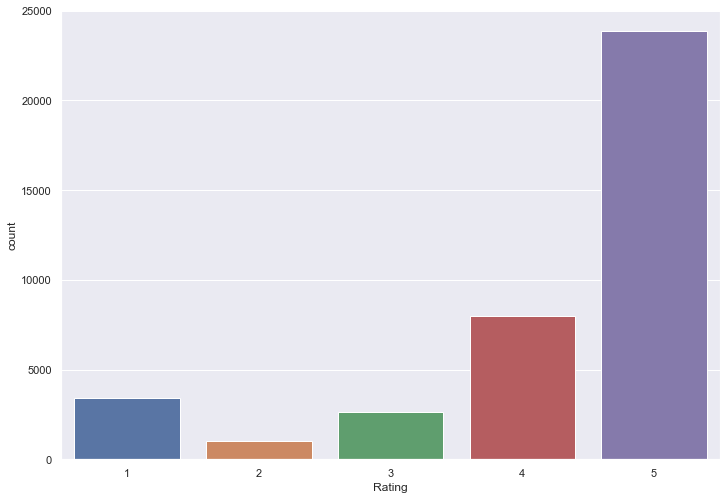

In [25]:
sns.countplot(df['Rating'])
print(df['Rating'].value_counts())

We can see from the above plot that there are 23853 '5 star' ratings, 7975 '4 star' ratings, 3389 '1 star' ratings, 2630 '3 star' ratings and 1004 '2 star' ratings.

character count

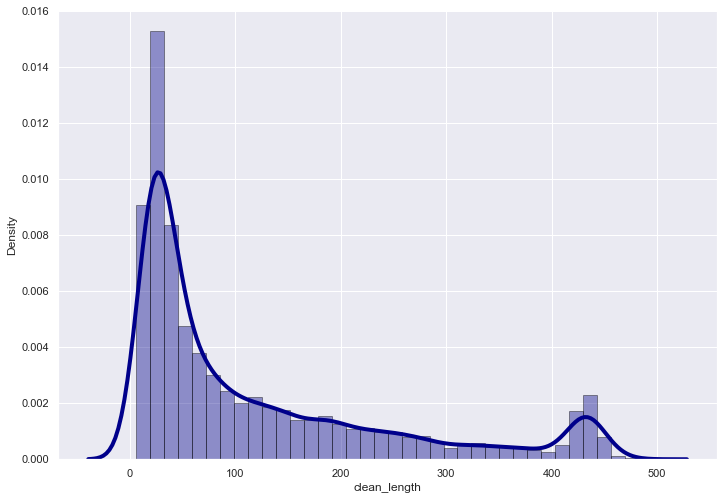

In [27]:
# density plot and histogram of all character count
sns.distplot(df['clean_length'], hist = True, kde = True,
            bins = int(180/5), color = 'darkblue',
            hist_kws = {'edgecolor':'black'},
            kde_kws = {'linewidth':4})
plt.show()


Top 30 most frequently occuring words

In [30]:
#function to plot most frequent terms
from nltk import FreqDist
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    #selecting top 30 most freq words
    d = words_df.nlargest(columns = 'count', n = terms)
    plt.figure(figsize = (20,10))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

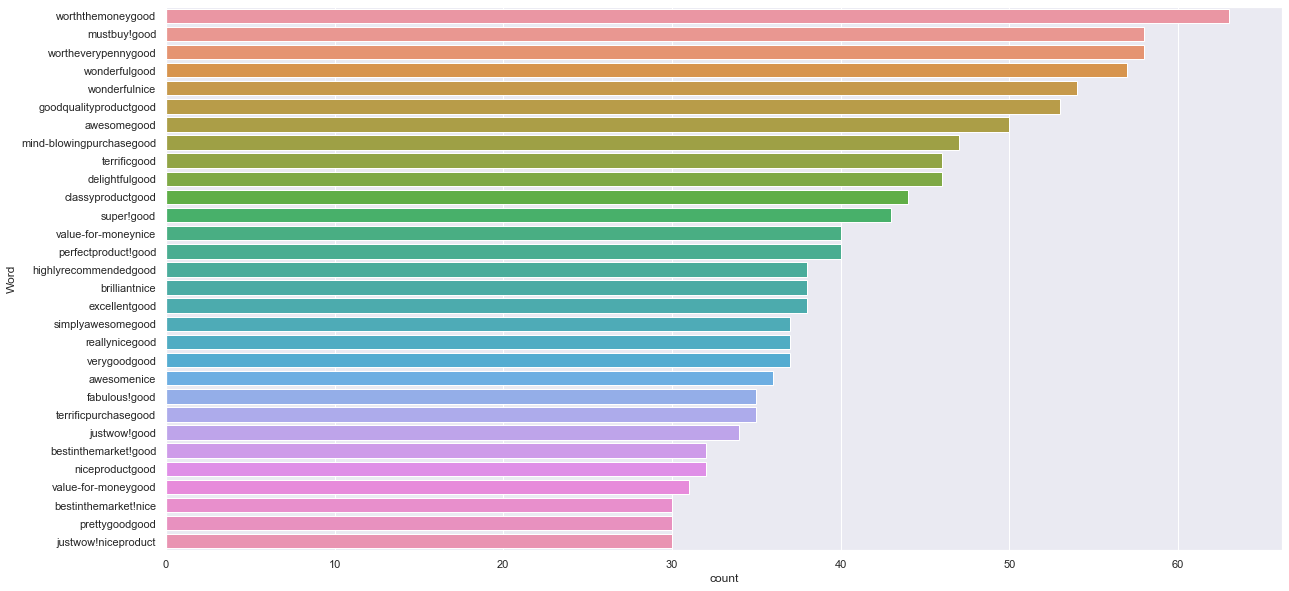

In [31]:
freq_words(df['Review'])

Top 30 rare words

In [32]:
#function to plot least frequent terms
def rare_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()),
                             'count':list(fdist.values())})
    #selecting top 30 most freq words
    d = words_df.nsmallest(columns = 'count', n = terms)
    plt.figure(figsize = (20,10))
    ax = sns.barplot(data = d, x='count', y='word')
    ax.set(ylabel = 'Word')
    plt.show()

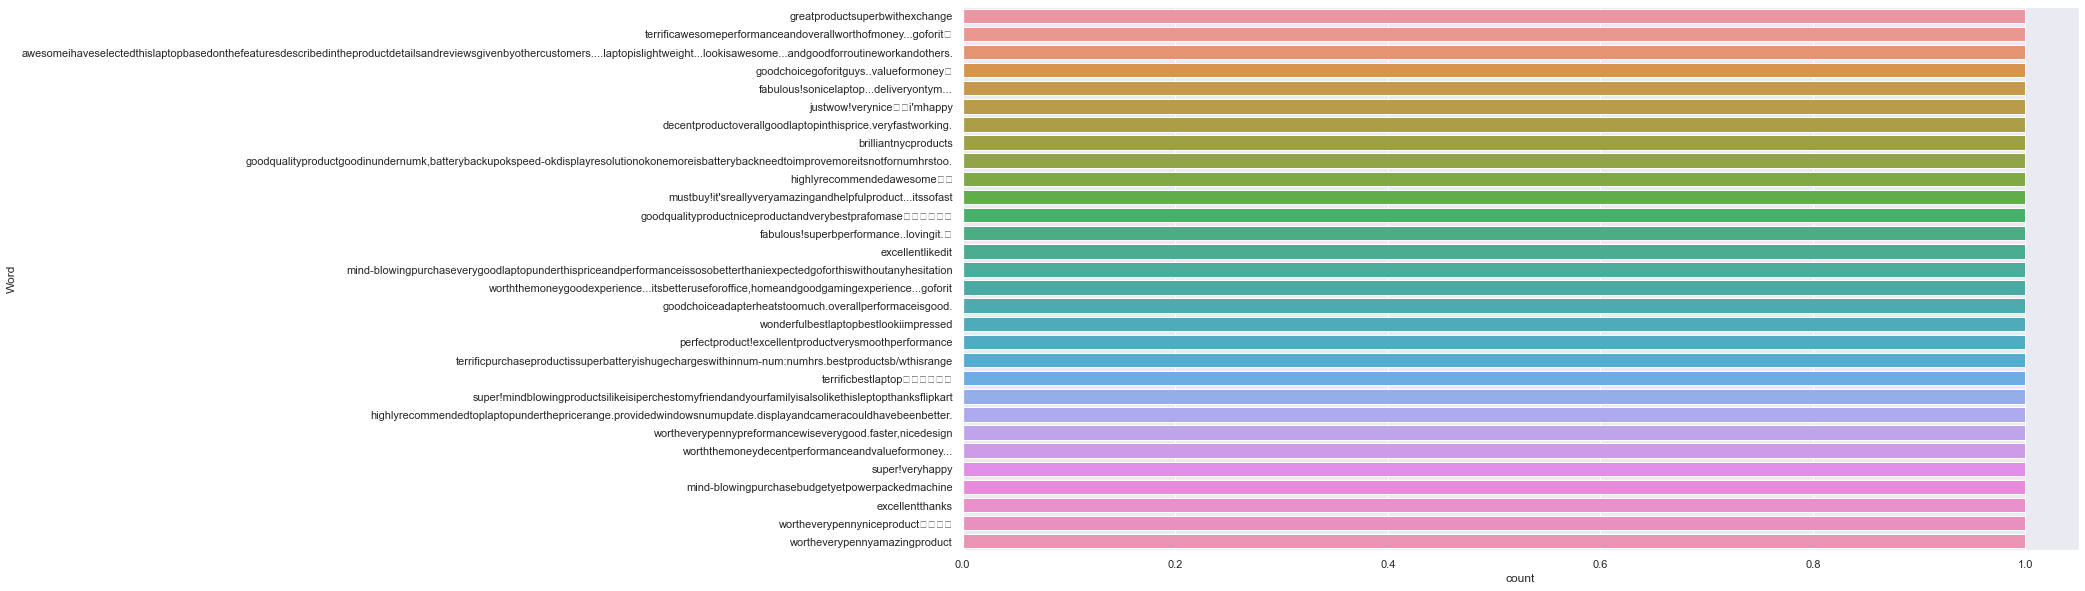

In [33]:
rare_words(df['Review'])

Word Cloud

In [34]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
                    background_color='white',
                    stopwords = stopwords,
                    max_words = 500,
                    max_font_size = 40,
                    scale = 3,
                    random_state = 1).generate(str(data))
    fig = plt.figure(1, figsize=(15,15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

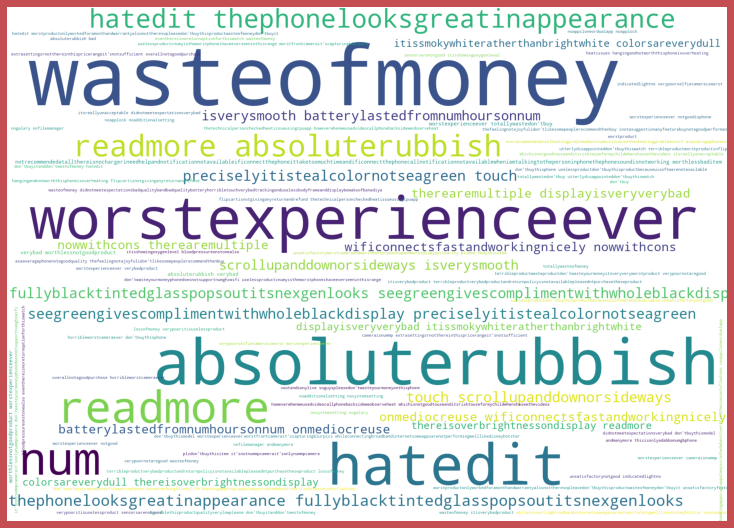

In [36]:
#Let's plot the loud words with Rating 1
from wordcloud import WordCloud

df1=df['Review'][df['Rating']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

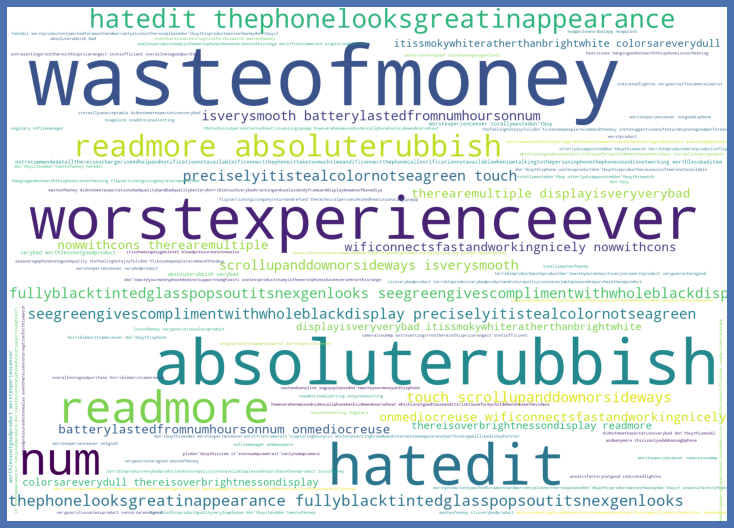

In [37]:
#Let's plot the loud words with Rating 2
from wordcloud import WordCloud

df2=df['Review'][df['Rating']==2]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

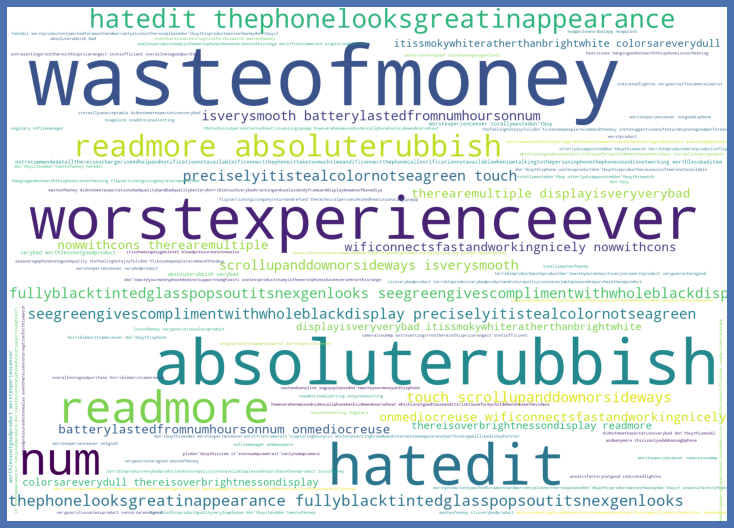

In [38]:
#Let's plot the loud words with Rating 3
from wordcloud import WordCloud

df2=df['Review'][df['Rating']==3]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

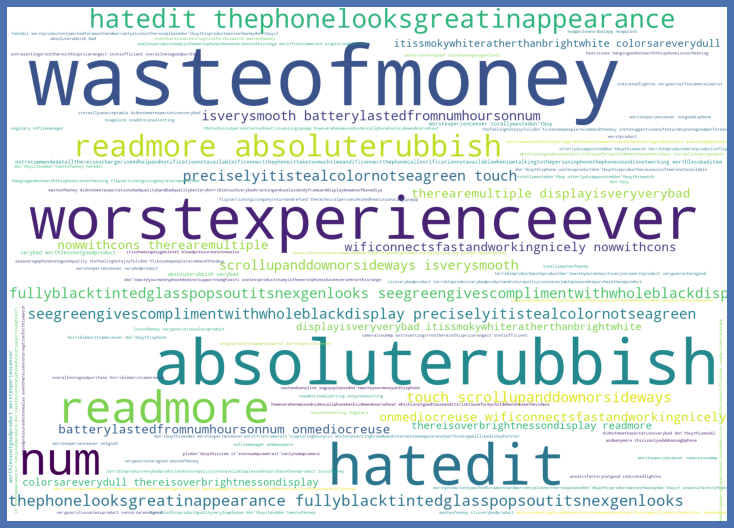

In [40]:
#Let's plot the loud words with Rating 4
from wordcloud import WordCloud

df2=df['Review'][df['Rating']==4]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

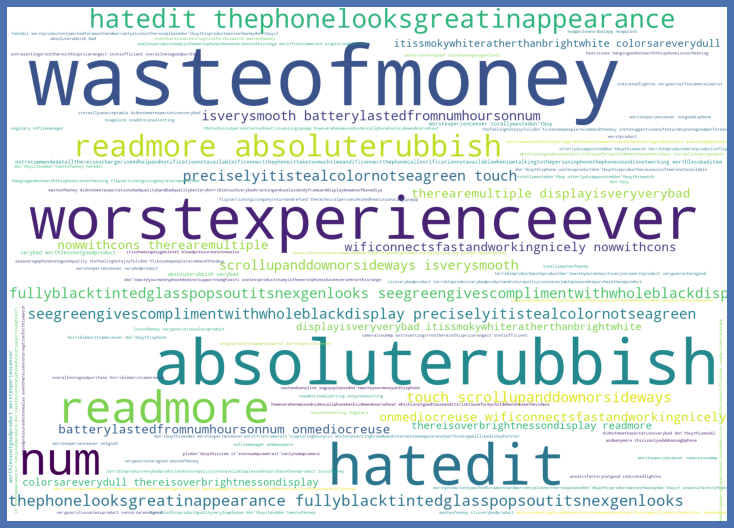

In [41]:
#Let's plot the loud words with Rating 5
from wordcloud import WordCloud

df2=df['Review'][df['Rating']==5]

spam_cloud = WordCloud(width=700,height=500,background_color='white',stopwords = stopwords,max_words = 100,max_font_size = 80,scale = 3,random_state = 1).generate(' '.join(df1))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

vectorization:

In [43]:
#converting text into vectors using TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(max_features=10000, stop_words='english')
feature= tfidf.fit_transform(df['Review'])

In [44]:
print(df.shape)

(38851, 5)


# Dividing Dataframe into feature and target

In [45]:
x=feature
y=df['Rating']

In [48]:
y.value_counts()

5    23853
4     7975
1     3389
3     2630
2     1004
Name: Rating, dtype: int64

In [49]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
xtrain,ytrain=sm.fit_resample(x,y)

In [50]:
ytrain.value_counts()

5    23853
4    23853
3    23853
1    23853
2    23853
Name: Rating, dtype: int64

# MODEL BUILDING

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Logistic Regression

In [53]:
lg=LogisticRegression()

for i in range(0,1000):
    train_x,test_x,train_y,test_y=train_test_split(xtrain,ytrain,test_size=0.20,random_state=i)
    lg.fit(train_x,train_y)
    pred_train=lg.predict(train_x)
    pred_test=lg.predict(test_x)
    if round(accuracy_score(train_y,pred_train)*100,1)==round(accuracy_score(test_y,pred_test)*100,1):
        print("At random state",i,"The model performs well")
        print("At random state:",i)
        print("Training Accuracy:",accuracy_score(train_y,pred_train)*100)
        print("Testing Accuracy:",accuracy_score(test_y,pred_test)*100)

At random state 24 The model performs well
At random state: 24
Training Accuracy: 72.63866180354673
Testing Accuracy: 72.57368045948098
At random state 31 The model performs well
At random state: 31
Training Accuracy: 72.52127614975056
Testing Accuracy: 72.50241059824761
At random state 47 The model performs well
At random state: 47
Training Accuracy: 72.60931539009768
Testing Accuracy: 72.6239885968222
At random state 80 The model performs well
At random state: 80
Training Accuracy: 72.59359409717855
Testing Accuracy: 72.57368045948098
At random state 114 The model performs well
At random state: 114
Training Accuracy: 72.45943906426865
Testing Accuracy: 72.52756466691821
At random state 147 The model performs well
At random state: 147
Training Accuracy: 72.50450677063681
Testing Accuracy: 72.46048715046325
At random state 152 The model performs well
At random state: 152
Training Accuracy: 72.64599840690899
Testing Accuracy: 72.55691108036724
At random state 156 The model performs well

In [54]:
train_x,test_x,train_y,test_y=train_test_split(xtrain,ytrain,test_size=0.20,random_state=355)
print("Classification Report:",classification_report(test_y,pred_test))
print("Confusion Matrix:",confusion_matrix(test_y,pred_test))

Classification Report:               precision    recall  f1-score   support

           1       0.20      0.14      0.17      4695
           2       0.20      0.44      0.27      4772
           3       0.20      0.13      0.16      4757
           4       0.21      0.14      0.17      4798
           5       0.20      0.15      0.17      4831

    accuracy                           0.20     23853
   macro avg       0.20      0.20      0.19     23853
weighted avg       0.20      0.20      0.19     23853

Confusion Matrix: [[ 679 2078  599  609  730]
 [ 677 2099  630  643  723]
 [ 683 2113  616  621  724]
 [ 656 2120  622  660  740]
 [ 660 2148  626  664  733]]


Cross Validation for logistic regression:

In [55]:
from sklearn.model_selection import cross_val_score

lg.fit(train_x,train_y)
lg.score(train_x,train_y)
pred_lg = lg.predict(test_x)

lss = accuracy_score(test_y,pred_lg)
for j in range(2,10):
    lsscore = cross_val_score(lg,xtrain,ytrain,cv=j)
    ls_cv = lsscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",ls_cv*100 )
    print("Accuracy score is :-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 69.16865737445082
Accuracy score is :- 72.6239885968222


At cv:- 3
Cross validation score is:- 69.80086362302437
Accuracy score is :- 72.6239885968222


At cv:- 4
Cross validation score is:- 70.52028314832093
Accuracy score is :- 72.6239885968222


At cv:- 5
Cross validation score is:- 70.02389636523708
Accuracy score is :- 72.6239885968222


At cv:- 6
Cross validation score is:- 70.59071264430793
Accuracy score is :- 72.6239885968222


At cv:- 7
Cross validation score is:- 70.39280785166044
Accuracy score is :- 72.6239885968222


At cv:- 8
Cross validation score is:- 70.75841684341944
Accuracy score is :- 72.6239885968222


At cv:- 9
Cross validation score is:- 70.76845467284275
Accuracy score is :- 72.6239885968222




In [56]:
print("At cv:",9)
print("Cross validation score is:",70.76845467284275)
print("Accuracy score is :",72.6239885968222)

At cv: 9
Cross validation score is: 70.76845467284275
Accuracy score is : 72.6239885968222


# Approaching more classifiers:

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

# 1.Decision Tree Classifier:

In [59]:
parameters = {'criterion':['gini', 'entropy'],'splitter':['best','random']}
dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'criterion': 'gini', 'splitter': 'random'}


In [60]:
dtc = DecisionTreeClassifier(criterion='gini', splitter='random')
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
pred_dtc = dtc.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_dtc)*100)
print("Classification report:",classification_report(test_y,pred_dtc)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_dtc)*100)

dtc_score = cross_val_score(dtc,xtrain,ytrain,cv=9)
dtc_cc = dtc_score.mean() 
print('Cross Val Score:',dtc_cc*100)

Accuracy Score: 73.7139982392152
Classification report:               precision    recall  f1-score   support

           1       0.98      0.69      0.81      4695
           2       0.45      0.97      0.61      4772
           3       0.98      0.63      0.76      4757
           4       0.90      0.65      0.76      4798
           5       0.98      0.74      0.84      4831

    accuracy                           0.74     23853
   macro avg       0.86      0.74      0.76     23853
weighted avg       0.86      0.74      0.76     23853
              precision    recall  f1-score   support

           1       0.98      0.69      0.81      4695
           2       0.45      0.97      0.61      4772
           3       0.98      0.63      0.76      4757
           4       0.90      0.65      0.76      4798
           5       0.98      0.74      0.84      4831

    accuracy                           0.74     23853
   macro avg       0.86      0.74      0.76     23853
weighted avg       0.8

# 2.KNeighbors Classifier:

In [61]:
parameters = {'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
knc = KNeighborsClassifier()
clf = GridSearchCV(knc,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'algorithm': 'auto'}


In [62]:
knc = KNeighborsClassifier(algorithm='auto', n_neighbors=5)
knc.fit(train_x,train_y)
knc.score(train_x,train_y)
pred_knc = knc.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_knc)*100)
print("Classification report:",classification_report(test_y,pred_knc)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_knc)*100)

knc_score = cross_val_score(knc,xtrain,ytrain,cv=9)
knc_cc = knc_score.mean() 
print('Cross Val Score:',knc_cc*100)

Accuracy Score: 68.90537877835074
Classification report:               precision    recall  f1-score   support

           1       0.93      0.70      0.80      4695
           2       0.88      0.53      0.66      4772
           3       0.42      0.97      0.58      4757
           4       0.90      0.62      0.73      4798
           5       0.98      0.63      0.77      4831

    accuracy                           0.69     23853
   macro avg       0.82      0.69      0.71     23853
weighted avg       0.82      0.69      0.71     23853
              precision    recall  f1-score   support

           1       0.93      0.70      0.80      4695
           2       0.88      0.53      0.66      4772
           3       0.42      0.97      0.58      4757
           4       0.90      0.62      0.73      4798
           5       0.98      0.63      0.77      4831

    accuracy                           0.69     23853
   macro avg       0.82      0.69      0.71     23853
weighted avg       0.

# 3.SVC:

In [66]:
svc = SVC(kernel='rbf')
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
pred_svc = svc.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_svc)*100)
print("Classification report:",classification_report(test_y,pred_svc)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_svc)*100)

svc_score = cross_val_score(svc,xtrain,ytrain,cv=9)
svc_cc = svc_score.mean() 
print('Cross Val Score:',svc_cc*100)

Accuracy Score: 72.75395128495367
Classification report:               precision    recall  f1-score   support

           1       0.98      0.68      0.80      4695
           2       0.44      0.98      0.60      4772
           3       0.96      0.61      0.74      4757
           4       0.91      0.63      0.75      4798
           5       0.99      0.74      0.85      4831

    accuracy                           0.73     23853
   macro avg       0.86      0.73      0.75     23853
weighted avg       0.86      0.73      0.75     23853
              precision    recall  f1-score   support

           1       0.98      0.68      0.80      4695
           2       0.44      0.98      0.60      4772
           3       0.96      0.61      0.74      4757
           4       0.91      0.63      0.75      4798
           5       0.99      0.74      0.85      4831

    accuracy                           0.73     23853
   macro avg       0.86      0.73      0.75     23853
weighted avg       0.

# 4.MultinomialNB

In [67]:
mnb = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
mnb.fit(train_x,train_y)
mnb.score(train_x,train_y)
pred_mnb = mnb.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_mnb)*100)
print("Classification report:",classification_report(test_y,pred_mnb)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_mnb)*100)

mnb_score = cross_val_score(mnb,xtrain,ytrain,cv=9)
mnb_cc = mnb_score.mean() 
print('Cross Val Score:',mnb_cc*100)

Accuracy Score: 68.58676057518971
Classification report:               precision    recall  f1-score   support

           1       0.41      0.97      0.58      4695
           2       0.95      0.49      0.65      4772
           3       0.91      0.62      0.74      4757
           4       0.90      0.62      0.74      4798
           5       0.95      0.72      0.82      4831

    accuracy                           0.69     23853
   macro avg       0.82      0.69      0.70     23853
weighted avg       0.83      0.69      0.71     23853
              precision    recall  f1-score   support

           1       0.41      0.97      0.58      4695
           2       0.95      0.49      0.65      4772
           3       0.91      0.62      0.74      4757
           4       0.90      0.62      0.74      4798
           5       0.95      0.72      0.82      4831

    accuracy                           0.69     23853
   macro avg       0.82      0.69      0.70     23853
weighted avg       0.

# ENSEMBLE METHODS:

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier

# 1.Random Forest Classifier:

In [69]:
parameters = {'criterion':['gini', 'entropy'],'n_estimators':[100]}
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc,parameters)
clf.fit(train_x,train_y)

print(clf.best_params_)

{'criterion': 'gini', 'n_estimators': 100}


In [70]:
rfc = RandomForestClassifier(criterion='gini', n_estimators=100)
rfc.fit(train_x,train_y)
rfc.score(train_x,train_y)
pred_rfc = rfc.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_rfc)*100)
print("Classification report:",classification_report(test_y,pred_rfc)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_rfc)*100)

rfc_score = cross_val_score(rfc,xtrain,ytrain,cv=9)
rfc_cc = rfc_score.mean() 
print('Cross Val Score:',rfc_cc*100)

Accuracy Score: 74.14580975139395
Classification report:               precision    recall  f1-score   support

           1       0.98      0.70      0.82      4695
           2       0.45      0.98      0.62      4772
           3       0.98      0.63      0.77      4757
           4       0.91      0.66      0.76      4798
           5       0.98      0.74      0.84      4831

    accuracy                           0.74     23853
   macro avg       0.86      0.74      0.76     23853
weighted avg       0.86      0.74      0.76     23853
              precision    recall  f1-score   support

           1       0.98      0.70      0.82      4695
           2       0.45      0.98      0.62      4772
           3       0.98      0.63      0.77      4757
           4       0.91      0.66      0.76      4798
           5       0.98      0.74      0.84      4831

    accuracy                           0.74     23853
   macro avg       0.86      0.74      0.76     23853
weighted avg       0.

# 2.Ada Boost Classifier:

In [71]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, algorithm='SAMME')
abc.fit(train_x,train_y)
abc.score(train_x,train_y)
pred_abc = abc.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_abc)*100)
print("Classification report:",classification_report(test_y,pred_abc)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_abc)*100)

abc_score = cross_val_score(abc,xtrain,ytrain,cv=9)
abc_cc = abc_score.mean() 
print('Cross Val Score:',abc_cc*100)

Accuracy Score: 35.999664612417725
Classification report:               precision    recall  f1-score   support

           1       0.87      0.39      0.54      4695
           2       0.00      0.00      0.00      4772
           3       0.24      0.99      0.38      4757
           4       1.00      0.10      0.19      4798
           5       1.00      0.32      0.48      4831

    accuracy                           0.36     23853
   macro avg       0.62      0.36      0.32     23853
weighted avg       0.62      0.36      0.32     23853
              precision    recall  f1-score   support

           1       0.87      0.39      0.54      4695
           2       0.00      0.00      0.00      4772
           3       0.24      0.99      0.38      4757
           4       1.00      0.10      0.19      4798
           5       1.00      0.32      0.48      4831

    accuracy                           0.36     23853
   macro avg       0.62      0.36      0.32     23853
weighted avg       0

# 3.Gradient Boosting Classifier:

In [72]:
gbc = GradientBoostingClassifier(criterion='mse', n_estimators=100, learning_rate=0.1, loss='deviance')
gbc.fit(train_x,train_y)
gbc.score(train_x,train_y)
pred_gbc = gbc.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_gbc)*100)
print("Classification report:",classification_report(test_y,pred_gbc)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_gbc)*100)

gbc_score = cross_val_score(gbc,xtrain,ytrain,cv=9)
gbc_cc = gbc_score.mean() 
print('Cross Val Score:',gbc_cc*100)

Accuracy Score: 55.22995011109714
Classification report:               precision    recall  f1-score   support

           1       0.92      0.58      0.71      4695
           2       1.00      0.42      0.59      4772
           3       0.32      0.96      0.47      4757
           4       0.77      0.35      0.48      4798
           5       0.99      0.45      0.62      4831

    accuracy                           0.55     23853
   macro avg       0.80      0.55      0.58     23853
weighted avg       0.80      0.55      0.58     23853
              precision    recall  f1-score   support

           1       0.92      0.58      0.71      4695
           2       1.00      0.42      0.59      4772
           3       0.32      0.96      0.47      4757
           4       0.77      0.35      0.48      4798
           5       0.99      0.45      0.62      4831

    accuracy                           0.55     23853
   macro avg       0.80      0.55      0.58     23853
weighted avg       0.

# XGBOOST:

In [73]:
import xgboost

xgb = xgboost.XGBClassifier()
xgb.fit(train_x,train_y)
xgb.score(train_x,train_y)
pred_xgb = xgb.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_xgb)*100)
print("Classification report:",classification_report(test_y,pred_xgb)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_xgb)*100)

xgb_score = cross_val_score(xgb,xtrain,ytrain,cv=9)
xgb_cc = gbc_score.mean() 
print('Cross Val Score:',xgb_cc*100)

[00:30:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 64.02968180103132
Classification report:               precision    recall  f1-score   support

           1       0.97      0.69      0.80      4695
           2       0.97      0.50      0.66      4772
           3       0.37      0.97      0.53      4757
           4       0.85      0.51      0.64      4798
           5       0.98      0.53      0.69      4831

    accuracy                           0.64     23853
   macro avg       0.83      0.64      0.67     23853
weighted avg       0.83      0.64      0.67     23853
              precision    recall  f1-score   support

           1       0.97      0.69      0.80      4695
           2       0.97      0.50  

# SGD Classifier:

In [76]:
sgd = SGDClassifier(loss='hinge')
sgd.fit(train_x,train_y)
sgd.score(train_x,train_y)
pred_sgd = sgd.predict(test_x)

print("Accuracy Score:",accuracy_score(test_y,pred_sgd)*100)
print("Classification report:",classification_report(test_y,pred_sgd)*100)
print("Confusion Matrix:",confusion_matrix(test_y,pred_sgd)*100)

sgd_score = cross_val_score(sgd,xtrain,ytrain,cv=9)
sgd_cc = abc_score.mean() 
print('Cross Val Score:',sgd_cc*100)

Accuracy Score: 70.38946882991657
Classification report:               precision    recall  f1-score   support

           1       0.94      0.70      0.80      4695
           2       0.97      0.50      0.66      4772
           3       0.42      0.96      0.59      4757
           4       0.90      0.63      0.74      4798
           5       0.95      0.73      0.83      4831

    accuracy                           0.70     23853
   macro avg       0.84      0.70      0.72     23853
weighted avg       0.84      0.70      0.72     23853
              precision    recall  f1-score   support

           1       0.94      0.70      0.80      4695
           2       0.97      0.50      0.66      4772
           3       0.42      0.96      0.59      4757
           4       0.90      0.63      0.74      4798
           5       0.95      0.73      0.83      4831

    accuracy                           0.70     23853
   macro avg       0.84      0.70      0.72     23853
weighted avg       0.

# AUC-ROC Curve:

In [ ]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(pred_svc,test_y)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC Curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()

# The best model is Support Vector Classifier. Since the difference between the percentage score of cross validation,accuracy_score and ROC Curve is optimum.

# Model Saving:

In [82]:
import pickle
filename='rating prediction.pkl'
pickle.dump(svc,open(filename,'wb'))

# Conclusion:

In [83]:
import numpy as np
a=np.array(test_y)
predicted=np.array(svc.predict(test_x))
rating_con=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
rating_con

,original,predicted
0,5,5
1,3,3
2,4,2
3,5,5
4,4,2
...,...,...
23848,3,2
23849,3,3
23850,2,2
23851,5,5


# From the above table, the model is predicted with 72 percent accuracy.
